## Load data

In [673]:
import pandas as pd 
import numpy as np  
import seaborn as sns   
import matplotlib.pyplot as plt 

In [674]:
sales_df = pd.read_csv("/Users/Marcy_Student/Desktop/Marcy_Projects/Mod1_Final_Project/data/raw/cafe_sales.csv", date_parser=["Transaction Date"],)

/var/folders/h0/75t8pd8571n2l1zzjcyqp7kh0000gp/T/ipykernel_79081/664495163.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  sales_df = pd.read_csv("/Users/Marcy_Student/Desktop/Marcy_Projects/Mod1_Final_Project/data/raw/cafe_sales.csv", date_parser=["Transaction Date"],)


## Getting a Quick info of the dataset

In [675]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [677]:
sales_df.head(15)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


## Data Cleaning and Preparation 🧹
1. convertion of the `Item`, `Quantity`, `Price Per Unit` columns to numeric and `Transaction Date` to Date time.

In [678]:
sales_df["Quantity"] = pd.to_numeric(sales_df["Quantity"], errors="coerce")
sales_df["Price Per Unit"] = pd.to_numeric(sales_df["Price Per Unit"], errors="coerce")
sales_df["Total Spent"] = pd.to_numeric(sales_df["Total Spent"], errors="coerce")
sales_df["Transaction Date"] = pd.to_datetime(sales_df["Transaction Date"], errors="coerce")
#sales_df.info()

2. Checking for missing values inside the data frame. 

In [679]:
sales_df.isna().sum()
#we have a lot of data missing, let's try to clean it and replace it 🧹 

Transaction ID         0
Item                 333
Quantity             479
Price Per Unit       533
Total Spent          502
Payment Method      2579
Location            3265
Transaction Date     460
dtype: int64

In [680]:
#sales_df['Price Per Unit'].unique()
sales_df_columns = ['Item', 'Quantity', 'Price Per Unit', 'Total Spent',
       'Payment Method', 'Location', 'Transaction Date']
for col in sales_df_columns:
    unique_values = sales_df[col].unique()
    print(f"\nThe unique values inside {col} are: {unique_values}")
    print(sales_df[col].value_counts())


The unique values inside Item are: ['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' nan
 'ERROR' 'Juice' 'Tea']
Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      344
ERROR        292
Name: count, dtype: int64

The unique values inside Quantity are: [ 2.  4.  5.  3.  1. nan]
Quantity
5.0    2013
2.0    1974
4.0    1863
3.0    1849
1.0    1822
Name: count, dtype: int64

The unique values inside Price Per Unit are: [2.  3.  1.  5.  4.  1.5 nan]
Price Per Unit
3.0    2429
4.0    2331
2.0    1227
5.0    1204
1.0    1143
1.5    1133
Name: count, dtype: int64

The unique values inside Total Spent are: [ 4.  12.   nan 10.  20.   9.  16.  15.  25.   8.   5.   3.   6.   2.
  1.   7.5  4.5  1.5]
Total Spent
6.0     979
12.0    939
3.0     930
4.0     923
20.0    746
15.0    734
8.0     677
10.0    524
2.0     497
9.0     479
5.0     468
16.0    444
25.0    259
7.5     237
1.0 

## Handling Missing Values
Let's fill the missing item values using the `Price Per Unit` column. We will be using the price of the item to identify which item should be in the empty spot.

However, because the prices are not all unique to each item, there are two scenarios when doing this:

1. The price is unique and only has one item for that price: We directly use a mapping function to replace the NaNs.
2. The price is not unique and has multiple items for that price: We figure out which item is more frequent and use that to fill the space.


In [681]:
sales_df["Price Per Unit"].isna().sum()

np.int64(533)

- First, let's replace the 'ERROR' and 'UNKNOWN' values by NaN in the Item, Payement Method and Location. 


In [682]:
sales_col = ['Item','Payment Method','Location']
for col in sales_col:
   sales_df[col] = sales_df[col].replace(['ERROR', 'UNKNOWN'], np.nan)


- Now 'ERROR', 'UNKNOWN' in `Item`, `Payement Method`, and `Location` are replaced by NaN. 


In [683]:
sales_df["Item"].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', nan, 'Sandwich',
       'Juice', 'Tea'], dtype=object)

In [684]:
# A dictionnary containing the price per unit for each item
price_dict = {
    'Coffee': 2.0,
    'Tea': 1.5,
    'Sandwich': 4.0,
    'Salad': 5.0,
    'Cake': 3.0,
    'Cookie': 1.0,
    'Smoothie': 4.0,
    'Juice': 3.0
}


We will now use this price_dict dictionary to fill the data that we can fill. Wherever the price is one of the keys in the price_dict dictionary, we will replace the NaN with the appropriate data.

In [685]:
sales_df["Price Per Unit"] = sales_df["Price Per Unit"].fillna(sales_df["Item"].map(price_dict))

In [686]:
sales_df["Price Per Unit"].isna().sum()
#Now we only have 54 missing values!

np.int64(54)

In [687]:
price_to_name_dict = {
  2.0: 'Coffee',
    1.5: 'Tea',
    5.0: 'Salad',
    1.0: 'Cookie',
    4.0: 'Sandwich',
}
sales_df['Item'] = sales_df['Item'].fillna(sales_df['Price Per Unit'].map(price_to_name_dict))


In [688]:
sales_df.isna().sum()

Transaction ID         0
Item                 288
Quantity             479
Price Per Unit        54
Total Spent          502
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

In [689]:
sales_df["Item"].isna().sum()
#Now we only have 103 missing values!

np.int64(288)

### Finding the missing values in `Total Spent` using the `Price Per Unit` and `Quantity`

In [690]:
#Total spent using total quantity and total price per unit 
total = sales_df['Total Spent'].isna() & sales_df['Quantity'].notna() & sales_df['Price Per Unit'].notna()
sales_df.loc[total, 'Total Spent'] = sales_df.loc[total, 'Quantity'] * sales_df.loc[total, 'Price Per Unit']

In [691]:
#Quantity using total quantity and total price per unit 
Quantity = sales_df["Quantity"].isna() & sales_df["Total Spent"].notna() & sales_df["Price Per Unit"].notna()
sales_df.loc[Quantity, "Quantity"] = sales_df.loc[Quantity, "Total Spent"] / sales_df.loc[Quantity, "Price Per Unit"]

In [692]:
#Price Per unit using total quantity and total price per unit 
Price_PU = sales_df["Price Per Unit"].isna() & sales_df["Total Spent"].notna() & sales_df["Quantity"].notna()
sales_df.loc[Price_PU, "Price Per Unit"] = sales_df.loc[Price_PU, "Total Spent"] / sales_df.loc[Price_PU, "Quantity"]

In [693]:
#Let's try to map again to fill the missing items. 
sales_df['Item'] = sales_df['Item'].fillna(sales_df['Price Per Unit'].map(price_to_name_dict))


Now all the remaining missing values in `Item`, `Quantity`, `Price Per Unit` and `Total Payement` are less than 5% of the total values, we can drop them because it they don't going to affect our analysis much
We were not able to fill in the remaing missing values in `Item` because "Juice" and "Cake" have the same price, they both cost $3. We can't map that using the Dictionary.

In [694]:
# Find the five percent threshold
threshold = len(sales_df) * 0.05

# Create a filter
cols_to_drop = sales_df.columns[sales_df.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
sales_df.dropna(subset=cols_to_drop, inplace=True)


In [695]:
sales_df.isna().sum()
#sales_df.info()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent            0
Payment Method      2930
Location            3685
Transaction Date       0
dtype: int64

### Checking for duplicate values 

In [696]:
sales_df.duplicated().sum()
#We don't have any duplicate value, that's a good news 🥳🥳🥳

np.int64(0)

### Let's create two new columns for the date

In [697]:
sales_df["Month"] = sales_df["Transaction Date"].dt.strftime("%B") #strftime extract the year from the date. 
sales_df["Day Of The Week"] =  sales_df["Transaction Date"].dt.day_name() # dt.date_name extract the name of the day.

In [698]:
sales_df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Month,Day Of The Week
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,September,Friday
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,May,Tuesday
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19,July,Wednesday
3,TXN_7034554,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27,April,Thursday
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,June,Sunday


## Exploratory Data Analysis    

1. Getting a quick summary of all the key statistics in a dataset using the `.describe()` method

In [699]:
sales_df.describe()

,Quantity,Price Per Unit,Total Spent,Transaction Date
count,9280.000000,9280.000000,9280.000000,9280
mean,3.020151,2.947252,8.913524,2023-07-01 22:22:14.482758656
min,1.000000,1.000000,1.000000,2023-01-01 00:00:00
25%,2.000000,2.000000,4.000000,2023-04-01 00:00:00
50%,3.000000,3.000000,8.000000,2023-07-02 00:00:00
75%,4.000000,4.000000,12.000000,2023-10-02 00:00:00
max,5.000000,5.000000,25.000000,2023-12-31 00:00:00
std,1.421102,1.295263,6.042873,NaN


## Popular Selling Times

- Let's find the most selling product in term of quantity


In [718]:
sales_df.groupby("Item")["Quantity"].sum().sort_values(ascending = False)

#Sandwich is the most selling product by quantity

Item
Sandwich    3936.0
Coffee      3766.0
Salad       3644.0
Tea         3441.0
Cookie      3427.0
Juice       3341.0
Cake        3278.0
Smoothie    3194.0
Name: Quantity, dtype: float64

- Now the most selling product by revenue. 



In [716]:
sales_df.groupby('Item')['Total Spent'].sum().sort_values(ascending=False)
#Salad is the most selling product. 

Item
Salad       18220.0
Sandwich    15744.0
Smoothie    12776.0
Juice       10023.0
Cake         9834.0
Coffee       7532.0
Tea          5161.5
Cookie       3427.0
Name: Total Spent, dtype: float64

- Next, let's identify peak months and peak days of the week

In [728]:
#sales_df.pivot_table(values="Total Spent", index="Month", columns="Item", sort=True)

In [736]:
sales_df.groupby("Month")["Total Spent"].sum().sort_values(ascending=0)

#June is most selling month.

Month
June         7158.0
October      7116.0
January      7098.0
March        7060.0
December     7018.0
April        6951.0
August       6861.5
November     6802.0
May          6770.5
July         6715.5
September    6685.0
February     6482.0
Name: Total Spent, dtype: float64

In [770]:
sales_df.groupby("Day Of The Week")["Total Spent"].sum().sort_values(ascending = False)
#Thursday is the peak of the week.

Day Of The Week
Thursday     12116.5
Friday       11998.0
Sunday       11984.5
Monday       11807.0
Tuesday      11784.5
Saturday     11691.5
Wednesday    11335.5
Name: Total Spent, dtype: float64

In [ ]:
sales_df["Week Day"] =  sales_df["Transaction Date"].dt.weekday()

/var/folders/h0/75t8pd8571n2l1zzjcyqp7kh0000gp/T/ipykernel_79081/3088471961.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_df.groupby("Day Of The Week")['Total Spent'].sum().plot(kind="line",figsize=(10,6),rot=45)


Text(0.5, 0, 'Day of Week')

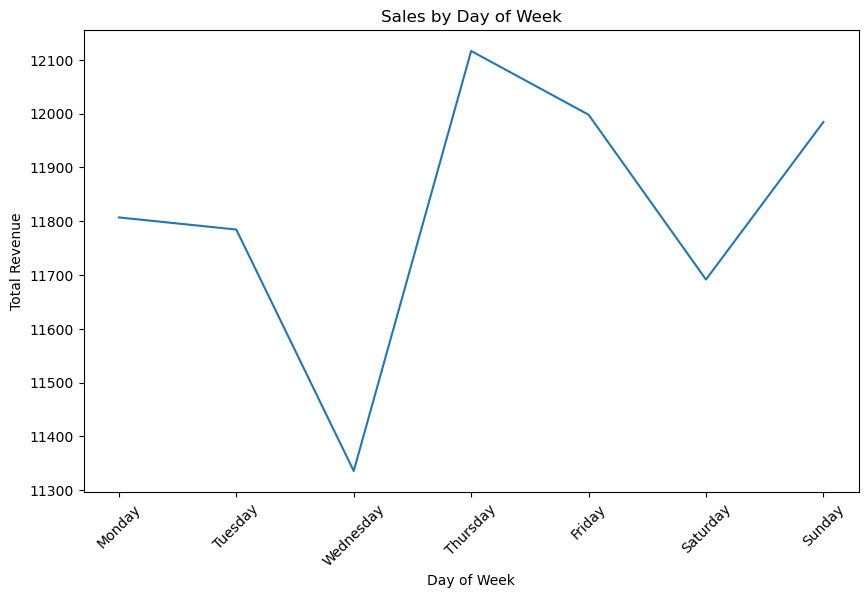

In [785]:
correct_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_df["Day Of The Week"] = pd.Categorical(sales_df["Day Of The Week"], categories=correct_order, ordered=True)
sales_df.groupby("Day Of The Week")['Total Spent'].sum().plot(kind="line",figsize=(10,6),rot=45)
plt.title('Sales by Day of Week')
plt.ylabel('Total Revenue')
plt.xlabel('Day of Week')

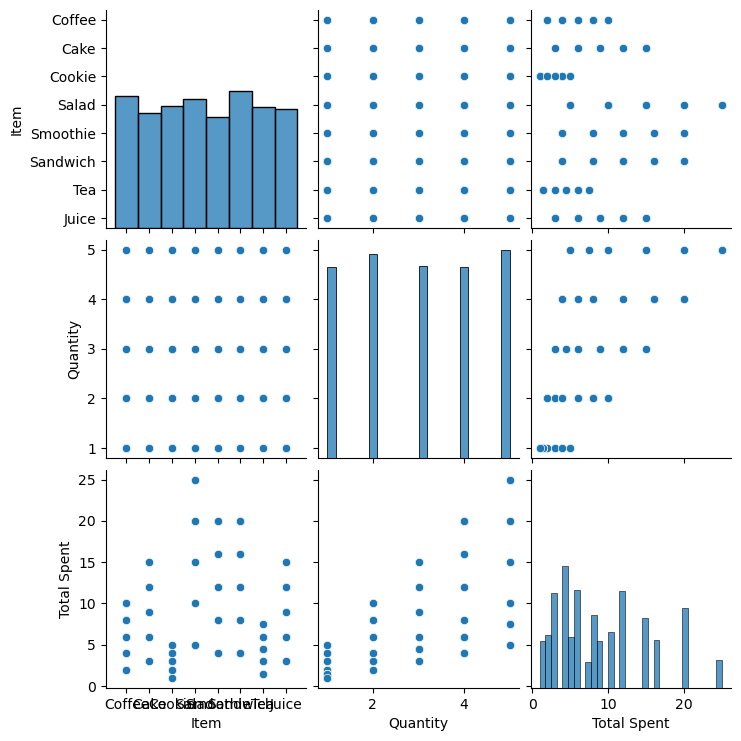

In [741]:

sns.pairplot(data=sales_df, vars=["Item" , "Quantity", "Total Spent"])
plt.show()

#### Relationship between `Total Spent` and `Payement Method`
- We can use a kernel density estimate (KDE) plot to visualition categorical variable. very useful to visualize the data specialy when multiple distributions are shown. 

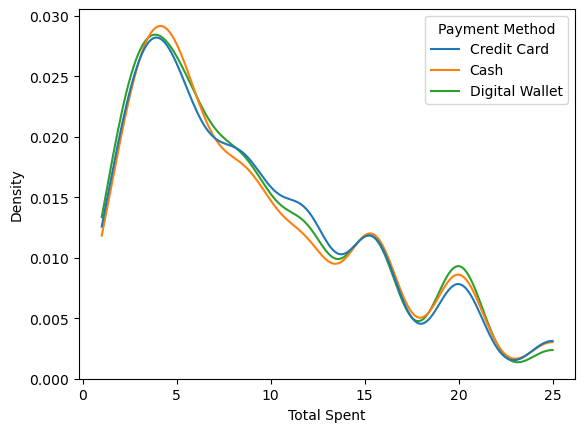

In [ ]:
sns.kdeplot(data=sales_df, x="Total Spent", hue="Payment Method", cut=0,)
plt.show()

In [654]:
#sales_df["Total Spent"].hist()
sales_df["Total Spent"].mean()

np.float64(8.913523706896552)

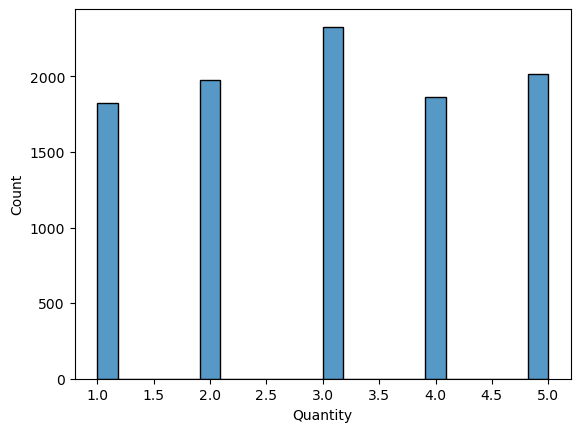

In [367]:
sns.histplot(data=sales_df, x="Quantity")
plt.show()

In [368]:

sales_df["Price Per Unit"].isna().sum()
sales_df["Price Per Unit"].unique()
sales_df["Price Per Unit"] = sales_df["Price Per Unit"].replace("ERROR", np.nan)
sales_df["Price Per Unit"] = sales_df["Price Per Unit"].replace("UNKNOWN", np.nan)
sales_df["Price Per Unit"] = pd.to_numeric(sales_df["Price Per Unit"])
#calculate the median price per unit. 
mean_price = sales_df["Price Per Unit"].mean()
#Replace the missing values in the price column by the median
sales_df["Price Per Unit"] = sales_df["Price Per Unit"].fillna(mean_price)
sales_df["Price Per Unit"].isna().sum()

np.int64(0)

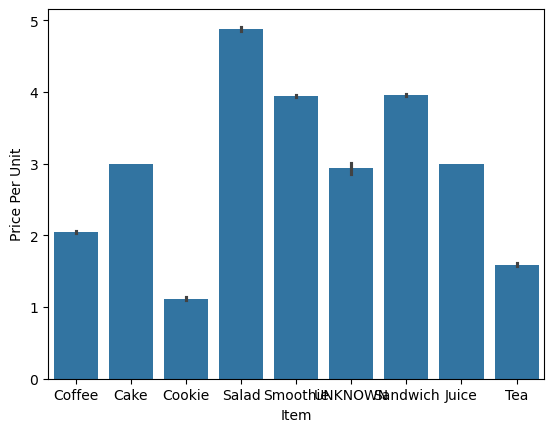

In [369]:
sns.barplot(data=sales_df, y="Price Per Unit", x="Item")
plt.show()

In [370]:

sales_df['Total Spent'].unique()
sales_df['Total Spent'] = sales_df['Total Spent'].replace("ERROR", np.nan)
sales_df['Total Spent'] = sales_df['Total Spent'].replace("UNKNOWN", np.nan)
sales_df['Total Spent'] = pd.to_numeric(sales_df['Total Spent'])
sales_df['Total Spent'] = round(sales_df['Total Spent'],1)
sales_df.info()
mean_T_Pr = sales_df['Total Spent'].mean()
sales_df['Total Spent'] = sales_df['Total Spent'].fillna(mean_T_Pr)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  object 
 1   Item              10000 non-null  object 
 2   Quantity          10000 non-null  float64
 3   Price Per Unit    10000 non-null  float64
 4   Total Spent       9498 non-null   float64
 5   Payment Method    7421 non-null   object 
 6   Location          6735 non-null   object 
 7   Transaction Date  9841 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


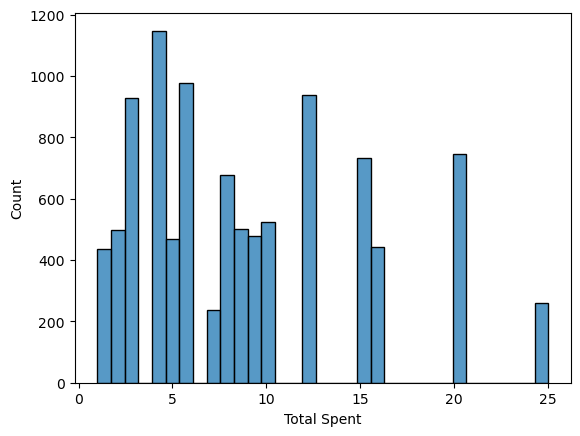

In [371]:
sns.histplot(data=sales_df, x='Total Spent')
plt.show()

In [372]:

sales_df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.000000,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.000000,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,8.924352,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.000000,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.000000,Digital Wallet,In-store,2023-06-11


In [392]:
sales_df["Transaction Date"].unique()
sales_df["Transaction Date"] = sales_df["Transaction Date"].replace("ERROR", np.nan)
sales_df["Transaction Date"] = sales_df["Transaction Date"].replace("UNKNOWN", np.nan)
sales_df['Transaction Date'] = pd.to_datetime(sales_df['Transaction Date'])
sales_df.head()
sales_df['Payment Method'].unique()
#sales_df.isna().sum()

array(['Credit Card', 'Cash', 'UNKNOWN', 'Digital Wallet', 'ERROR', nan],
      dtype=object)

In [401]:
sales_df["Payment Method"] = sales_df["Payment Method"].replace("UNKNOWN", np.nan)
sales_df["Payment Method"] = sales_df["Payment Method"].replace("ERROR", np.nan)
sales_df["Location"] = sales_df["Location"].replace("ERROR", np.nan)
sales_df["Location"] = sales_df["Location"].replace("UNKNOWN", np.nan)


sales_df.isna().sum()


Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent            0
Payment Method      3178
Location            3961
Transaction Date     460
dtype: int64

In [281]:
threshold = len(sales_df) * .05
#col_drop = sales_df.columns[]

In [ ]:
weekday = sales_df["Transaction Date"].dt.dayofweek
weekend = sales_df['Transaction Date'].dt.weekday >= 5
labels = ["Weekday","Weekend"]
bins = [weekday,weekend]

sales_df["days Categories"] = pd.cut(sales_df["Transaction Date"],
                                     labels=labels,
                                     bins=bins)


